# Predict Book Rating With Linear Regression

The goal of this analysis is to predict book rating and to understand what are the important factors that make a book more popular than others. The sections of this analysis include:
1. Data Exploration
2. Data Cleaning
3. Data Visualisation
4. Data Preprocessing
5. Machine Learning Model

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
sns.set(style="darkgrid")
sns.set_palette("deep")

# Data Exploration

In [3]:
# read the data
data = pd.read_csv('books.csv', error_bad_lines = False)

# DEA (Data Exploratory Analysis)

In [4]:
# show the first few rows
data.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [5]:
# check basic features and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
bookID                13714 non-null int64
title                 13714 non-null object
authors               13714 non-null object
average_rating        13714 non-null float64
isbn                  13714 non-null object
isbn13                13714 non-null int64
language_code         13714 non-null object
# num_pages           13714 non-null int64
ratings_count         13714 non-null int64
text_reviews_count    13714 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


The dataset contains both numerical and categorical data types.

In [6]:
# check no. of records
len(data)

13714

# Data Cleaning

In [7]:
# check for doublications
data.duplicated().any()

False

In [8]:
# check if there are any missing values
data.isnull().any()

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
# num_pages           False
ratings_count         False
text_reviews_count    False
dtype: bool

Let's use heatmap to visualise above result

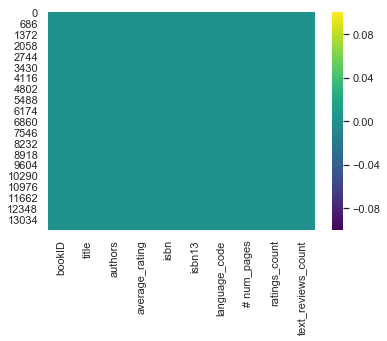

In [9]:
sns.heatmap(data.isnull(), cmap='viridis')

No duplicated or missing values, that makes things a little easier.

# Data Visualisation

Text(0,0.5,'Frequency')

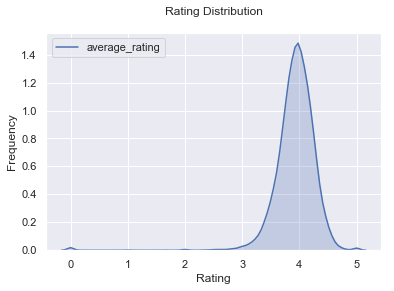

In [10]:
# ratings distribution
sns.kdeplot(data['average_rating'], shade = True)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Frequency')

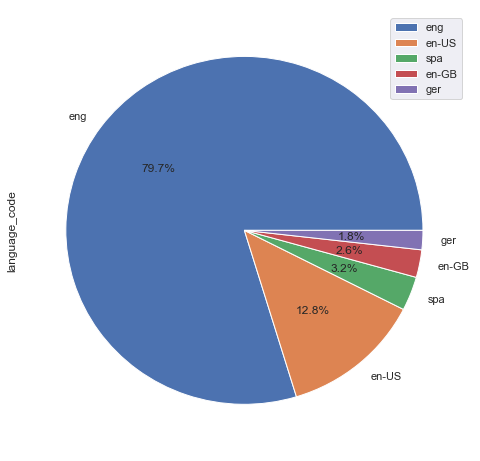

In [11]:
# sns.set_palette("deep")
# top 5 languages
data['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()
# plt.axis('equal')


Over 95% of books are in English, which means this variable is nearly constant

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

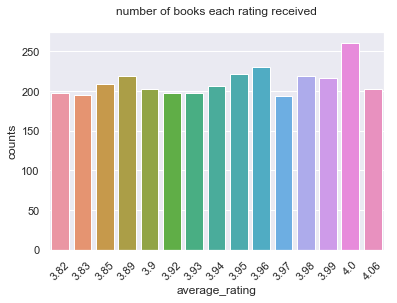

In [12]:
# number of books per rating
# sns.countplot(x = "average_rating", data=data, order=np.arange(start=0, stop=5.5, step=0.5))
sns.barplot(data['average_rating'].value_counts().head(15).index, data['average_rating'].value_counts().head(15))
plt.title('number of books each rating received\n')
plt.xlabel('average_rating')
plt.ylabel('counts')
plt.xticks(rotation=45)

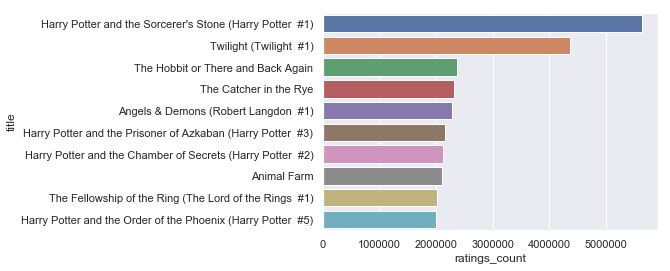

In [13]:
# highest rated books
popular_books = data.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
sns.barplot(popular_books, popular_books.index)

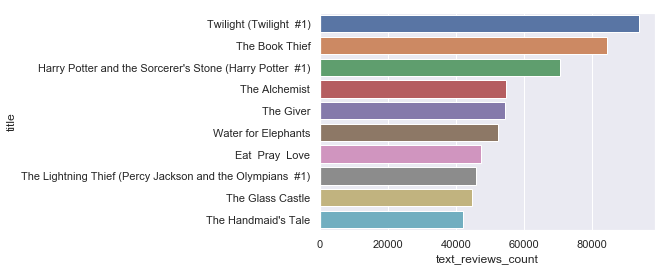

In [14]:
# highest reviewed books
highest_reviews = data.nlargest(10, ['text_reviews_count'])
sns.barplot(highest_reviews['text_reviews_count'], highest_reviews['title'])

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 <a list of 10 Text xticklabel objects>)

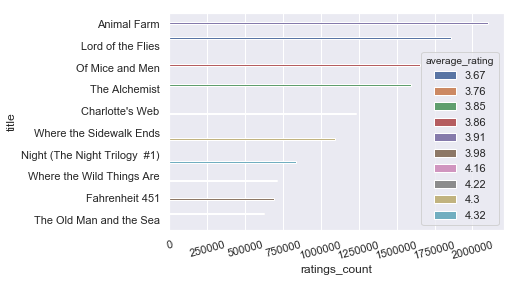

In [15]:
# top 10 books under 200 pages for busy book lovers
under200 = data[data['# num_pages'] <= 200]
top10under200 = under200.nlargest(10, ['ratings_count'])
sns.barplot(top10under200['ratings_count'], top10under200['title'], hue=top10under200['average_rating'])
plt.xticks(rotation=15)

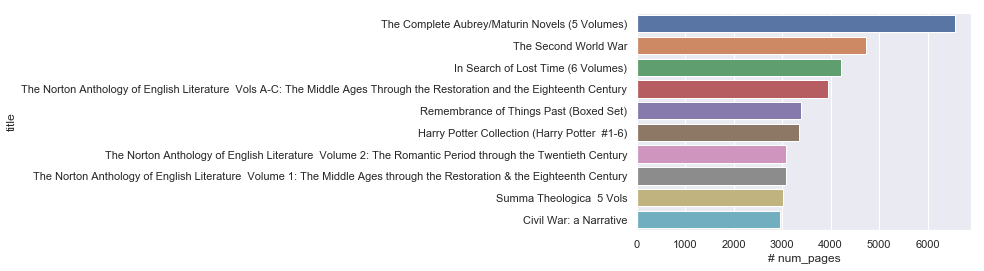

In [16]:
# top 10 longest books
longest_books = data.nlargest(10, ['# num_pages']).set_index('title')
sns.barplot(longest_books['# num_pages'], longest_books.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

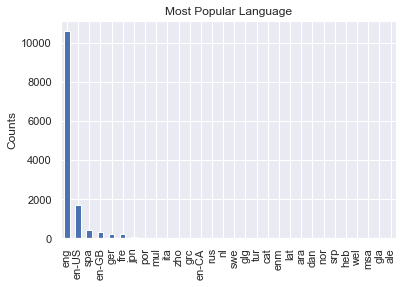

In [17]:
# top languages
data['language_code'].value_counts().plot(kind='bar')
plt.title("Most Popular Language")
plt.ylabel("Counts")
plt.xticks(rotation=90)

Text(0.5,0,'Number of Publications')

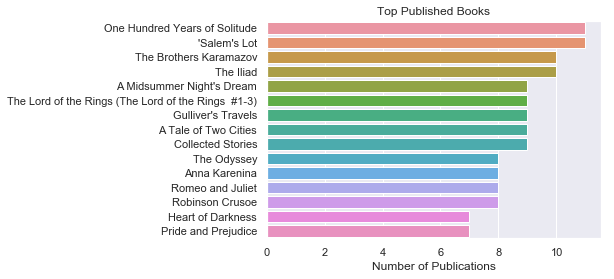

In [18]:
sns.barplot(data['title'].value_counts()[:15], data['title'].value_counts().index[:15])
plt.title("Top Published Books")
plt.xlabel("Number of Publications")

In [19]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

Above script allows to switch from the default ascii to utf-8, the Python runtime will use whenever it has to decode a string buffer to unicode.

Text(0.5,0,'Total Ratings')

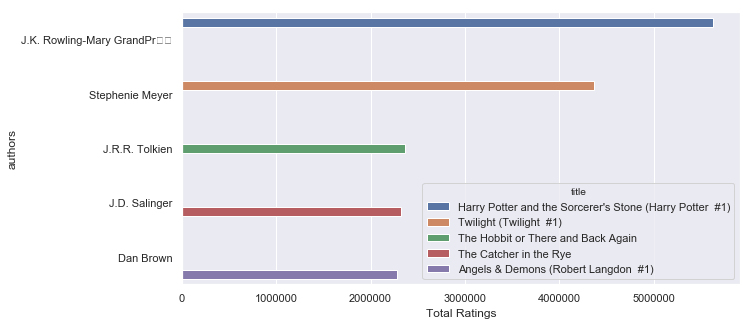

In [20]:
# authors with highest rated books
plt.figure(figsize=(10, 5))
most = data.nlargest(5, ['ratings_count']).set_index('authors')
sns.barplot(most['ratings_count'], most.index, ci=None, hue=most['title'])
plt.xlabel("Total Ratings")

Text(0.5,0,'No. of Publications')

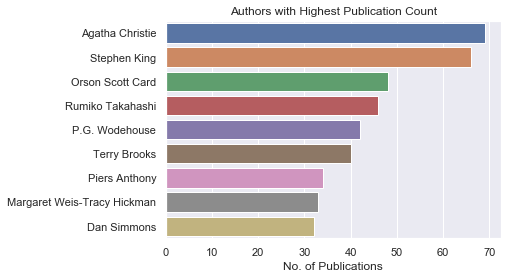

In [21]:
# authors with highest publications
top_authors = data['authors'].value_counts().head(9)
sns.barplot(top_authors, top_authors.index)
plt.title("Authors with Highest Publication Count")
plt.xlabel("No. of Publications")

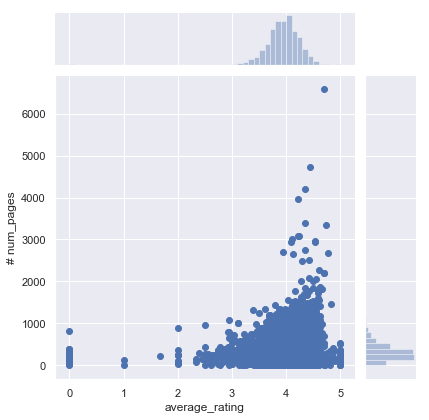

In [22]:
# visualise a bivariate distribution between ratings & no. of pages
sns.jointplot(x = 'average_rating', y = '# num_pages', data = data)

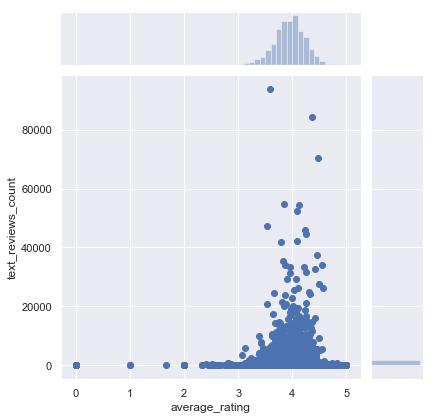

In [23]:
# visualise a bivariate distribution between ratings & no. of reviews
sns.jointplot(x = 'average_rating', y = 'text_reviews_count', data = data)

# Data Preprocessing

Data preprocessing is the conversion of data into machine-readable form can be interpreted, analysed and used by machine learning algorithms. In this analysis we will apply anomaly detection and feature engineering techniques.

### 1) Anomaly Detection

The main goal of this section is to remove extreme outliers (abnormal distance from other values) from features, this will have a positive impact on the accuracy of the model.

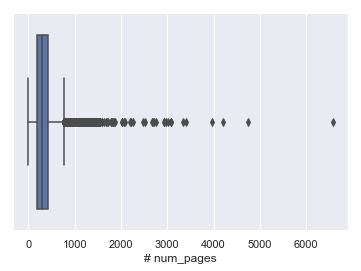

In [24]:
# find no. of pages outliers
sns.boxplot(x=data['# num_pages'])

Above plot shows points between 1,000 to 6,000, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.

In [25]:
# remove outliers from no. of pages 
data = data.drop(data.index[data['# num_pages'] >= 1000])

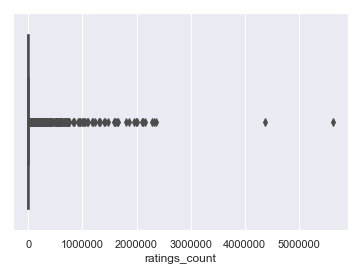

In [26]:
# find ratings count outliers
sns.boxplot(x=data['ratings_count'])

Above plot shows points between 1,000,000 to 5,000,000 are outliers.

In [27]:
# remove outliers from ratings_count
data = data.drop(data.index[data['ratings_count'] >= 1000000])

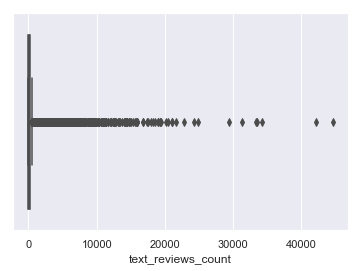

In [28]:
# find text reviews count outliers
sns.boxplot(x=data['text_reviews_count'])

Above plot shows points between 20,000 to 80,000 are outliers

In [29]:
# remove outliers from text_reviews_count
data = data.drop(data.index[data['text_reviews_count'] >= 20000])

### 2) Feature Engineering

Feature engineering is the process of selecting and transforming variables when creating a predictive model. Many machine learning algorithms require that their input is numerical and therefore categorical features such as title, authors and language code must be transformed into numerical features before we can use any of these algorithms.

In [30]:
# encode title column
le = preprocessing.LabelEncoder()
data['title'] = le.fit_transform(data['title'])

In [31]:
# encode authors column
data['authors'] = le.fit_transform(data['authors'])

In [32]:
# encode language column
enc_lang = pd.get_dummies(data['language_code'])
data = pd.concat([data, enc_lang], axis = 1)

# Machine Learning Model

The aim of this section is to come up with a model for predicting the book ratings. We'll use linear regression to build a model that predicts book ratings. Linear regression algorithm is a basic predictive analytics technique. There are two kinds of variables in a linear regression model:
1. The __input__ or __predictor variable__ is the variable(s) that help predict the value of the output variable. It is commonly referred to as __X__.
2. The __output variable__ is the variable that we want to predict. It is commonly referred to as __Y__.

In [33]:
# divide the data into attributes and labels
X = data.drop(['average_rating', 'language_code', 'isbn'], axis = 1)
y = data['average_rating']

Attributes are the independent variables whilst labels are dependent variables whose values are to be predicted.

In [34]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

test_size variable is where we actually specify the proportion of the test set. Now to train our algorithm, we need to import LinearRegression class instantiate it, and call the fit() method along with the training data.

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Next step is to use the test data to check accurately our algorithm predicts the percentage score.

In [36]:
predictions = lr.predict(X_test)

Now compare the actual output values for X_test with the predicted values.

In [37]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.89,3.906657
1,3.68,3.852037
2,4.24,3.968779
3,4.16,3.959306
4,3.95,3.850069
5,4.18,3.959197
6,3.30,3.909884
7,4.08,3.881800
8,3.61,3.910487
9,3.93,3.884989


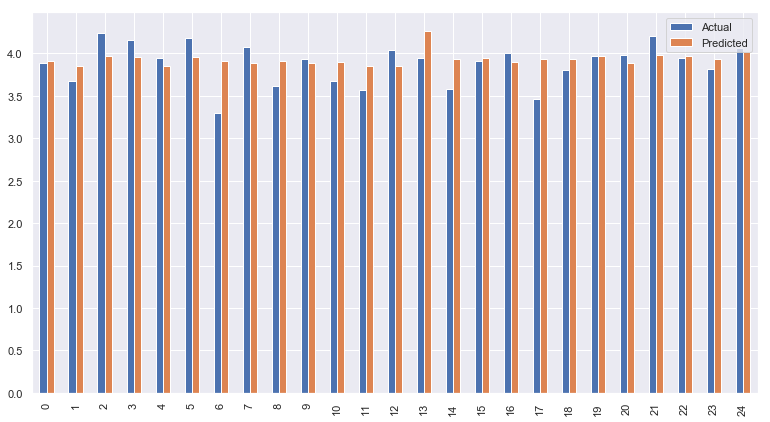

In [38]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

Though the model is not very precise, the predicted percentages are close to the actual ones.

In [39]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))